# Theme 5: Model validation & Optimization

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

Loading the data from the previous notebooks

In [3]:
df_titanic = pd.read_pickle("./titanic.pkl")
df_california = pd.read_pickle("./cali.pkl")

In [4]:
df_titanic

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,...,Sex_male,FamilySize,isSingle,officialTitle,ageGroup_Adult,ageGroup_Child,ageGroup_Senior,fareBin_Cheap,fareBin_Expensive,fareBin_Medium
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,...,True,2,False,Mr.,True,False,False,True,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,...,False,2,False,Mrs.,True,False,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,...,False,1,True,Miss.,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,...,False,2,False,Mrs.,True,False,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,...,True,1,True,Mr.,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,False,False,...,False,6,False,Mrs.,True,False,False,False,False,True
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,...,True,1,True,Rev.,True,False,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,...,False,1,True,Miss.,False,True,False,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,...,True,1,True,Mr.,True,False,False,False,False,True


In [5]:
df_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerPerson,BedroomsRatio,PeoplePerRoom,Dist_to_LA,Dist_to_SF,Dist_to_CityCenter
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526,0.659647,-1.145833,0.365909,1.193192,-1.466328,0.210950
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585,0.854906,-0.987175,0.338217,1.184481,-1.466613,0.210238
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521,0.855758,-1.440115,0.338105,1.187613,-1.475570,0.187883
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413,0.267179,-0.493194,0.437991,1.190614,-1.479174,0.178885
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422,0.787681,-0.706259,0.347265,1.190614,-1.479174,0.178885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781,-0.005720,0.199064,0.507508,1.442093,-0.685395,2.160208
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771,-0.016671,0.036771,0.510760,1.469167,-0.710623,2.097236
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923,0.228066,0.036167,0.446761,1.449414,-0.732563,2.042474
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847,0.465232,0.117506,0.398387,1.469711,-0.755238,1.985875


In [7]:
X_titanic = df_titanic.drop(columns=[
    "Survived", "PassengerId", "Name", "Ticket", "officialTitle"
])
y_titanic = df_titanic["Survived"]

In [9]:
pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

K-Fold Cross-Validation (k=5) on Titanic

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline_lr,
    X_titanic,
    y_titanic,
    cv=kf,
    scoring="accuracy"
)

print("K-Fold CV Accuracy scores:", cv_scores)
print(f"Mean ± Std: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

K-Fold CV Accuracy scores: [0.74825175 0.76923077 0.78321678 0.87412587 0.77464789]
Mean ± Std: 0.790 ± 0.044


Training the model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic,
    y_titanic,
    test_size=0.2,
    stratify=y_titanic,
    random_state=42
)

pipeline_lr.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

Model accuracy

In [14]:
test_accuracy = pipeline_lr.score(X_test, y_test)
print(f"Train/Test Accuracy: {test_accuracy:.3f}")

Train/Test Accuracy: 0.790


## OPTION B: Learning curves for both datasets
Logistic Regression vs Random Forest
### Titanic dataset
#### Logistic regression

In [17]:
train_sizes, train_scores, val_scores = learning_curve(
    pipeline_lr,
    X_titanic,
    y_titanic,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

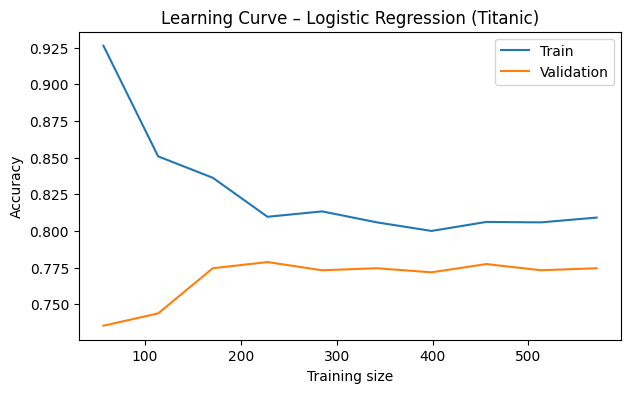

In [18]:
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(7,4))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, val_mean, label="Validation")
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.title("Learning Curve – Logistic Regression (Titanic)")
plt.legend()
plt.show()

#### Random Forest

In [19]:
pipeline_rf = Pipeline([
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ))
])

train_sizes, train_scores, val_scores = learning_curve(
    pipeline_rf,
    X_titanic,
    y_titanic,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

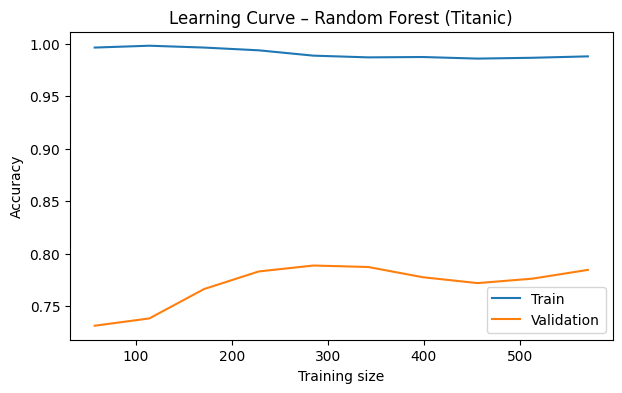

In [20]:
plt.figure(figsize=(7,4))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.title("Learning Curve – Random Forest (Titanic)")
plt.legend()
plt.show()

### California housing
#### Regression

In [22]:
X_cali = df_california.drop(columns=["MedHouseVal"])
y_cali = df_california["MedHouseVal"]

In [23]:
pipeline_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

In [24]:
train_sizes, train_scores, val_scores = learning_curve(
    pipeline_ridge,
    X_cali,
    y_cali,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

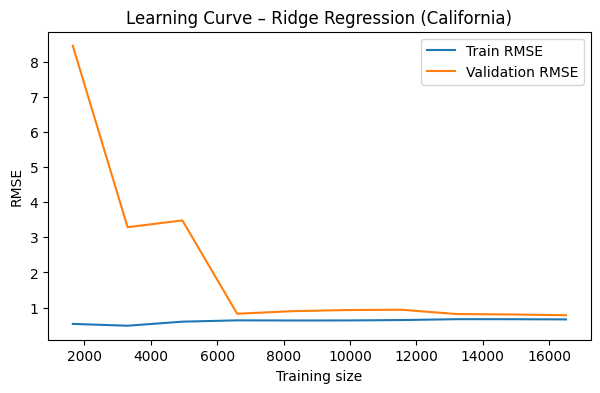

In [25]:
plt.figure(figsize=(7,4))
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Train RMSE")
plt.plot(train_sizes, -val_scores.mean(axis=1), label="Validation RMSE")
plt.xlabel("Training size")
plt.ylabel("RMSE")
plt.title("Learning Curve – Ridge Regression (California)")
plt.legend()
plt.show()